In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [2]:
cadd = pd.read_csv("gRNA_all_A.CADD.vcf",sep="\t")

In [3]:
deepsea = pd.read_csv("DeepSEA\\infile.vcf.out.funsig",index_col=0)

In [4]:
deepsea.head()

,chr,pos,name,ref,alt,Functional significance score
8414,chr2,58989521,chr2_58989520_58989521,A,G,0.000008
8226,chr2,58798567,chr2_58798566_58798567,A,G,0.000008
8790,chr2,59529146,chr2_59529145_59529146,A,G,0.000012
12940,chr6,135644531,chr6_135644530_135644531,T,C,0.000014
12941,chr6,135644532,chr6_135644531_135644532,T,C,0.000014


In [5]:
cadd.head()

,#Chrom,Pos,Ref,Alt,RawScore,PHRED
0,11,4167375,A,G,1.180779,14.33
1,11,4167377,A,G,0.917018,12.72
2,11,4167378,A,G,1.191687,14.39
3,11,4167381,A,G,0.815325,11.98
4,11,4167382,A,G,0.725929,11.29


In [6]:
df = pd.read_csv("9112_As_EBM_FDR.tsv",sep="\t",index_col=0)

In [7]:
deepsea['name'] = deepsea['chr']+":"+(deepsea['pos']-1).astype(str)+"-"+deepsea['pos'].astype(str)

In [8]:
deepsea.index = deepsea['name']

cadd['name'] = "chr"+cadd['#Chrom'].astype(str)+":"+(cadd['Pos']-1).astype(str)+"-"+cadd['Pos'].astype(str)
cadd.index = cadd['name']
df['CADD'] = cadd['PHRED']
df['DeepSEA'] = deepsea['Functional significance score']

In [9]:
df.to_csv("9112_combined_A_scores.csv")

In [10]:
df.head()

,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA
name,,,,,,,,,,,
chr11:4167376-4167377,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","1, 2",2,"0.0057890256172122906, 0.05075315571133837",0.004617,12.72,0.035078
chr11:4167377-4167378,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","2, 3",2,"0.0006637531335270759, 0.01736156959881251",0.000361,14.39,0.021679
chr11:4167380-4167381,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","5, 6",2,"0.00018472146078126313, 0.01994125184132767",0.000145,11.98,0.033376
chr11:4167381-4167382,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","6, 7",2,"0.0002607930129786362, 0.04178584344281158",0.000345,11.29,0.062163
chr11:4167383-4167384,"CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9","CAAGCAACAGTTGACCAACA, ACAAGCAACAGTTGACCAAC","0.0001496, 0.011439","8, 9",2,"0.0010517731094800192, 0.1297924727400633",0.002541,10.77,0.045018


In [11]:
df.shape

(9112, 11)

In [12]:
df['logDeepSEA'] = df['DeepSEA'].apply(lambda x:-np.log10(x))
df['logHbFBase'] = df['EBM_FDR'].apply(lambda x:-np.log10(x))

In [13]:
df.sort_values('logHbFBase',ascending=False).head(n=10)

,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,logHbFBase
name,,,,,,,,,,,,,
chr2:57948197-57948198,"CAGGAAGACACAGCGGACTG, ACGAGGCCAGGAAGACACAG, AG...","0.1792, 0.0, 8.394399999999999e-09, 1.2919e-07","4, 11, 3, 2","CAGGAAGACACAGCGGACTG, ACGAGGCCAGGAAGACACAG, AG...","0.1792, 0.0, 8.394399999999999e-09, 1.2919e-07","4, 11, 3, 2",4,"0.25578477538185723, 3.118081756103646e-299, 1...",3.657379e-306,8.406,0.025955,1.585779,305.436830
chr11:5173162-5173163,"TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","1, 2, 5","TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","1, 2, 5",3,"3.869669530222119e-299, 0.0015188677152428067,...",8.237872e-304,19.200,0.002727,2.564251,303.084185
chr11:5173167-5173168,"TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","6, 7, 10","TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","6, 7, 10",3,"1.74326880333313e-300, 0.0012505068437606163, ...",1.044272e-303,4.582,0.074771,1.126267,302.981186
chr11:5173168-5173169,"TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","7, 8, 11","TATCTGAATGACAAGCTGGT, CTATCTGAATGACAAGCTGG, TT...","0.0, 0.00034233, 4.4867999999999995e-08","7, 8, 11",3,"3.65292800444196e-300, 0.00240677465620518, 1....",3.100096e-303,8.334,0.040297,1.394727,302.508625
chr11:5305929-5305930,TACTCATGGTCTATCTCTCC,0.0,5,TACTCATGGTCTATCTCTCC,0.0,5,1,1.2347691228694058e-300,1.234769e-300,7.766,0.029630,1.528268,299.908414
chr2:57948205-57948206,"GTTCATGTCTTGACGAGGCC, ACGAGGCCAGGAAGACACAG","0.3836, 0.0","15, 3",ACGAGGCCAGGAAGACACAG,0.0,3,1,1.517752390839454e-300,1.517752e-300,8.792,0.024246,1.615360,299.818799
chr11:5264367-5264368,GCACTGTAACAAGCTGCACG,0.0,7,GCACTGTAACAAGCTGCACG,0.0,7,1,3.65292800444196e-300,3.652928e-300,12.990,0.102060,0.991144,299.437359
chr11:5264372-5264373,GCACTGTAACAAGCTGCACG,0.0,2,GCACTGTAACAAGCTGCACG,0.0,2,1,4.4368524968387426e-300,4.436852e-300,15.690,0.040016,1.397766,299.352925
chr11:5264366-5264367,GCACTGTAACAAGCTGCACG,0.0,8,GCACTGTAACAAGCTGCACG,0.0,8,1,7.030568913636491e-300,7.030569e-300,14.890,0.067533,1.170484,299.153010


In [14]:
df.sort_values('logHbFBase',ascending=True).head(n=10)

,gRNAs,FDRs,pos,filtered_gRNAs,filtered_FDRs,filtered_pos,length,new_FDR,EBM_FDR,CADD,DeepSEA,logDeepSEA,logHbFBase
name,,,,,,,,,,,,,
chr6:135773013-135773014,TTCTTTGCTCTAAATCAGTA,0.95031,11,TTCTTTGCTCTAAATCAGTA,0.95031,11,1,1,1.0,4.498,0.058934,1.229634,-0.0
chr11:5706360-5706361,"GCATTTCTCCACGTAGGGCC, CAATGGCATTTCTCCACGTA, CC...","0.41958, 0.00015188, 2.0769999999999998e-09","10, 15, 16",GCATTTCTCCACGTAGGGCC,0.41958,10,1,1,1.0,5.502,0.020744,1.683107,-0.0
chr11:5706357-5706358,CCTACGTGGAGAAATGCCAT,0.19819,9,CCTACGTGGAGAAATGCCAT,0.19819,9,1,1,1.0,7.743,0.013848,1.858613,-0.0
chr11:5706355-5706356,CCTACGTGGAGAAATGCCAT,0.19819,11,CCTACGTGGAGAAATGCCAT,0.19819,11,1,1,1.0,8.031,0.012930,1.888401,-0.0
chr11:5706339-5706340,"GAAAGTGAAAGATAAACTAT, GGAAAGTGAAAGATAAACTA, AA...","0.025113, 0.7977, 0.089017","18, 19, 11",AAAGATAAACTATGGGCCAA,0.089017,11,1,1,1.0,9.438,0.038615,1.413244,-0.0
chr11:5706303-5706304,GTGTGAGCAAGAATTTCCTG,0.64598,8,GTGTGAGCAAGAATTTCCTG,0.64598,8,1,1,1.0,10.120,0.006487,2.187956,-0.0
chr11:5706302-5706303,GTGTGAGCAAGAATTTCCTG,0.64598,9,GTGTGAGCAAGAATTTCCTG,0.64598,9,1,1,1.0,11.940,0.005166,2.286879,-0.0
chr11:5706300-5706301,GTGTGAGCAAGAATTTCCTG,0.64598,11,GTGTGAGCAAGAATTTCCTG,0.64598,11,1,1,1.0,11.180,0.012352,1.908263,-0.0
chr2:60783499-60783500,ATTACCTCTGAAAGGTTCTG,0.041582,10,ATTACCTCTGAAAGGTTCTG,0.041582,10,1,1,1.0,21.800,0.001968,2.705975,-0.0


             High          Low
count  152.000000  1136.000000
mean     1.696682     1.562875
std      0.711137     0.691494
min      0.364888     0.374780
25%      1.141800     1.047742
50%      1.615772     1.374214
75%      2.041505     1.944163
max      3.989955     4.559075
0.005410012092511273


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


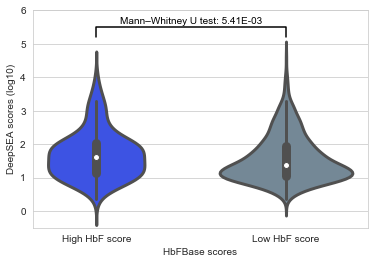

In [15]:

from decimal import Decimal
sns.set_style("whitegrid")
top_n = df[df['logHbFBase']>=50]['logDeepSEA'].tolist()
bot_n = df[df['logHbFBase']==0]['logDeepSEA'].tolist()
plot_df = pd.DataFrame([top_n,bot_n]).T
plot_df.columns = ['High',"Low"]
print (plot_df.describe())
plot_df = pd.melt(plot_df)
color_dict={}
color_dict['High'] = "#213fff"
color_dict['Low'] = "#6e899c"
sns.violinplot(x="variable",y='value',data=plot_df,palette =color_dict,linewidth=3,width=0.7,cut=3)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
y=5.2
h=0.3
print (scipy.stats.mannwhitneyu(top_n,bot_n).pvalue)
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c="black")
plt.text(0.5, y+h+0.05, "Mann–Whitney U test: %.2E" % scipy.stats.mannwhitneyu(top_n,bot_n).pvalue, ha='center', va='bottom', color="black")
plt.ylim(-0.5,6)
# plt.xlim(-1,2)
# my_list = []
# for k in color_dict:
#     my_list.append(mpatches.Patch(color=color_dict[k], label=k))
# plt.legend(handles=my_list)
plt.xticks([0,1],['High HbF score','Low HbF score'])
plt.xlabel("HbFBase scores")
plt.ylabel("DeepSEA scores (log10)")
plt.savefig("DeepSEA-HbFBase-high-low.pdf", bbox_inches='tight')

0.0006095692079444641


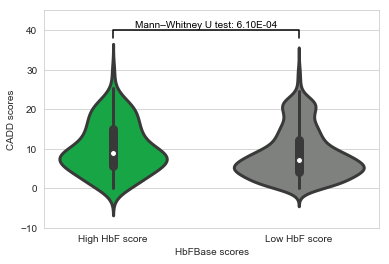

In [16]:

from decimal import Decimal
sns.set_style("whitegrid")
top_n = df[df['logHbFBase']>=50]['CADD'].tolist()
bot_n = df[df['logHbFBase']==0]['CADD'].tolist()
print (scipy.stats.mannwhitneyu(top_n,bot_n).pvalue)

plot_df = pd.DataFrame([top_n,bot_n]).T
plot_df.columns = ['High',"Low"]
# print (plot_df.describe())
plot_df = pd.melt(plot_df)
color_dict={}
color_dict['High'] = "#00bd3c"
color_dict['Low'] = "#7d827e"
# plt.figure(figsize=(7,4))
sns.violinplot(x="variable",y='value',data=plot_df,palette =color_dict,linewidth=3,width=0.7,cut=3)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
y=38
h=2
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c="black")
plt.text(0.5, y+h+0.05, "Mann–Whitney U test: %.2E" % scipy.stats.mannwhitneyu(top_n,bot_n).pvalue, ha='center', va='bottom', color="black")
plt.ylim(-10,45)
# plt.xlim(-1,2)
# my_list = []
# for k in color_dict:
#     my_list.append(mpatches.Patch(color=color_dict[k], label=k))
# plt.legend(handles=my_list)
plt.xticks([0,1],['High HbF score','Low HbF score'])
plt.xlabel("HbFBase scores")
plt.ylabel("CADD scores")
plt.savefig("CADD-HbFBase-high-low.pdf", bbox_inches='tight')

In [17]:
df.to_csv("9112_combined_A_scores.csv")